In [8]:
import pandas as pd
import numpy as np
import scanpy.api as sc

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=150, color_map='viridis')
sc.logging.print_versions()
out_path = "/home/kevin/deepcell_project/revision1_september19/rosmap_deconvolution/training_data/processed_data/"
num_top_genes = 100

scanpy==1.4.4 anndata==0.6.22.post1 umap==0.3.10 numpy==1.16.4 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.2 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
path = "/home/kevin/deepcell_project/revision1_september19/rosmap_deconvolution/training_data/GSE97930_FrontalCortex_snDrop-seq_UMI_Count_Matrix_08-01-2017.txt"
adata = sc.read_text(path).T
adata

AnnData object with n_obs × n_vars = 10319 × 34305 

In [3]:
sc.pp.filter_cells(adata, min_genes=400)
sc.pp.filter_genes(adata, min_cells=5)
adata.obs['n_counts'] = adata.X.sum(axis=1)
adata

filtered out 2096 cells that haveless than 400 genes expressed
filtered out 12556 genes that are detectedin less than 5 cells


AnnData object with n_obs × n_vars = 8223 × 21749 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

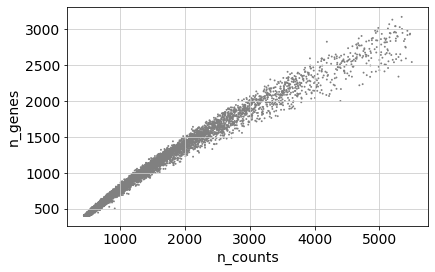

In [4]:
sc.pl.scatter(adata, x="n_counts", y='n_genes')

In [5]:
adata = adata[adata.obs['n_genes'] < 2500, :]
adata = adata[adata.obs['n_counts'] < 4500, :]
adata.raw = sc.pp.log1p(adata, copy=True)
adata

AnnData object with n_obs × n_vars = 8048 × 21749 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

In [6]:
 # Normalize per cell
sc.pp.normalize_per_cell(adata)

normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [9]:
 # Save the complete matrix
df = pd.DataFrame(adata.X)
df.columns = adata.var.index
df.to_csv(out_path + "lakeFrontal_norm_counts_all.txt", sep="\t")

extracting highly variable genes
    finished (0:00:03)


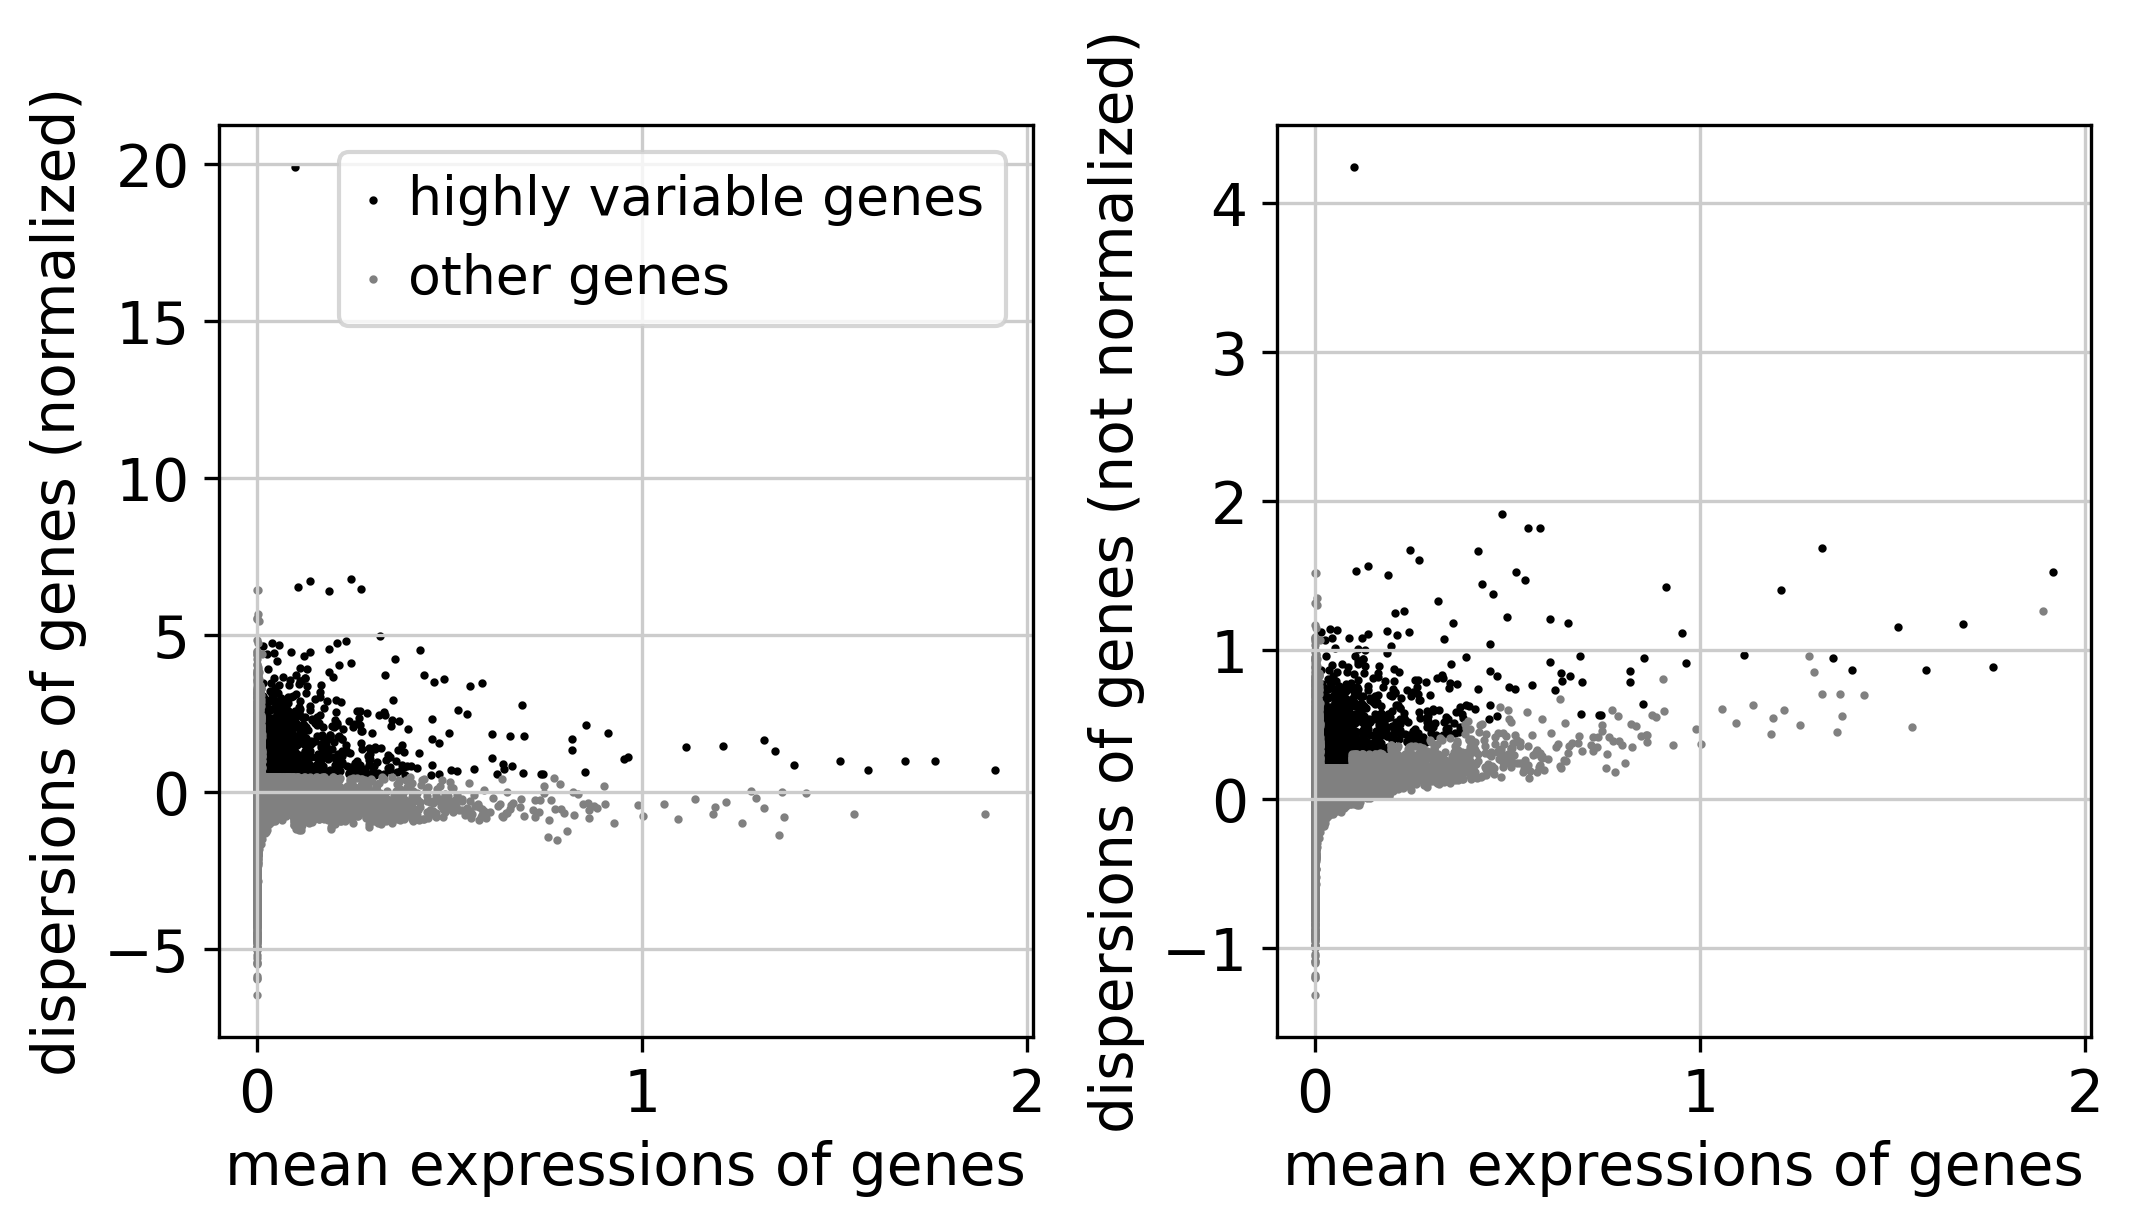

In [10]:
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)

In [11]:
adata = adata[:, filter_result.gene_subset]
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.regress_out(adata, ['n_counts'])
sc.pp.scale(adata)

normalizing by total count per cell


Trying to set attribute `.obs` of view, making a copy.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
regressing out ['n_counts']
    finished (0:00:22)


In [12]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.tsne(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
    finished (0:00:00)
    finished (0:00:07)
computing UMAP
    finished (0:00:39)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished (0:02:57)


In [19]:
sc.tl.louvain(adata, resolution=2)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01)


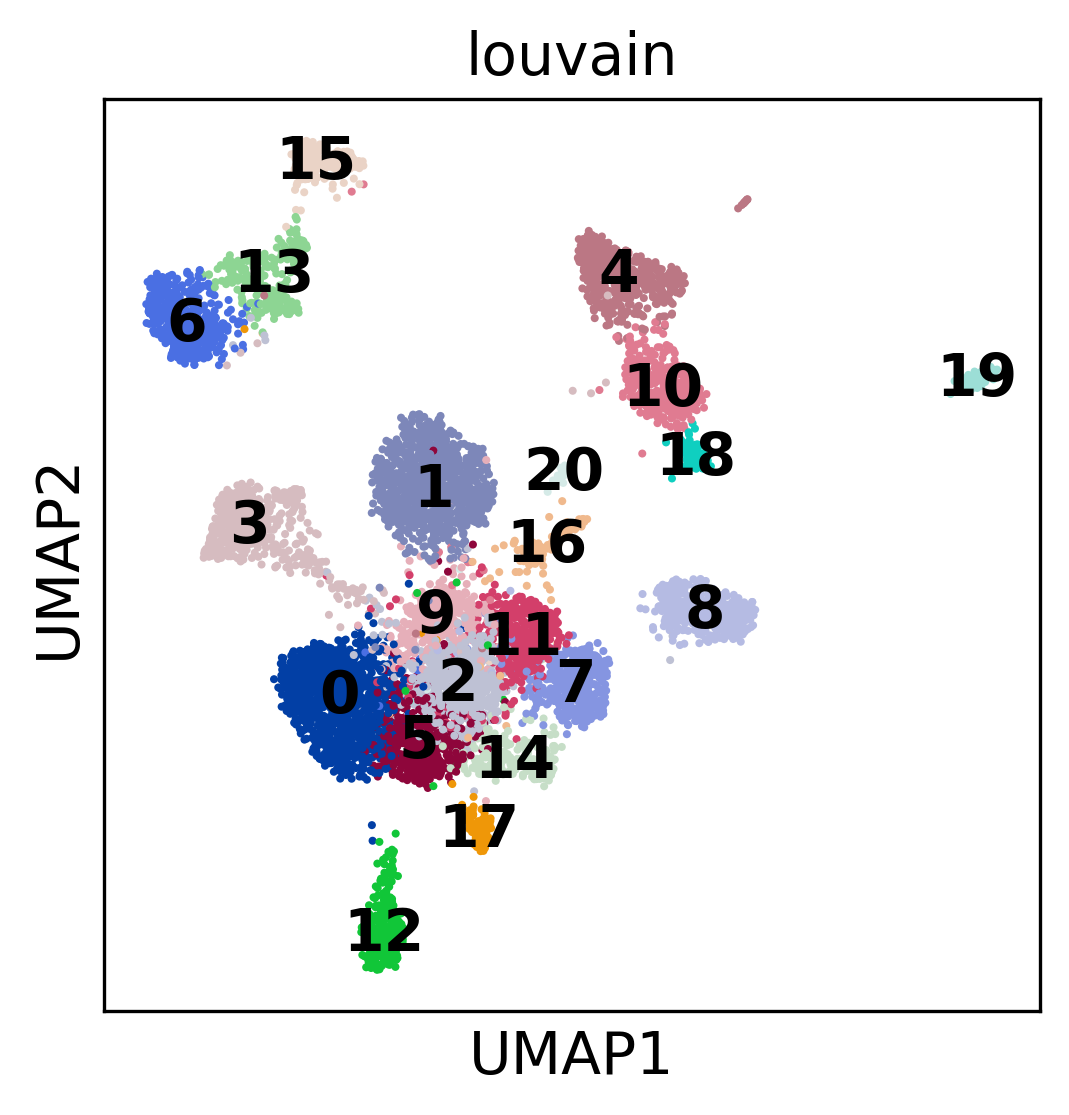

In [20]:
sc.pl.umap(adata, color='louvain', legend_loc='on data')

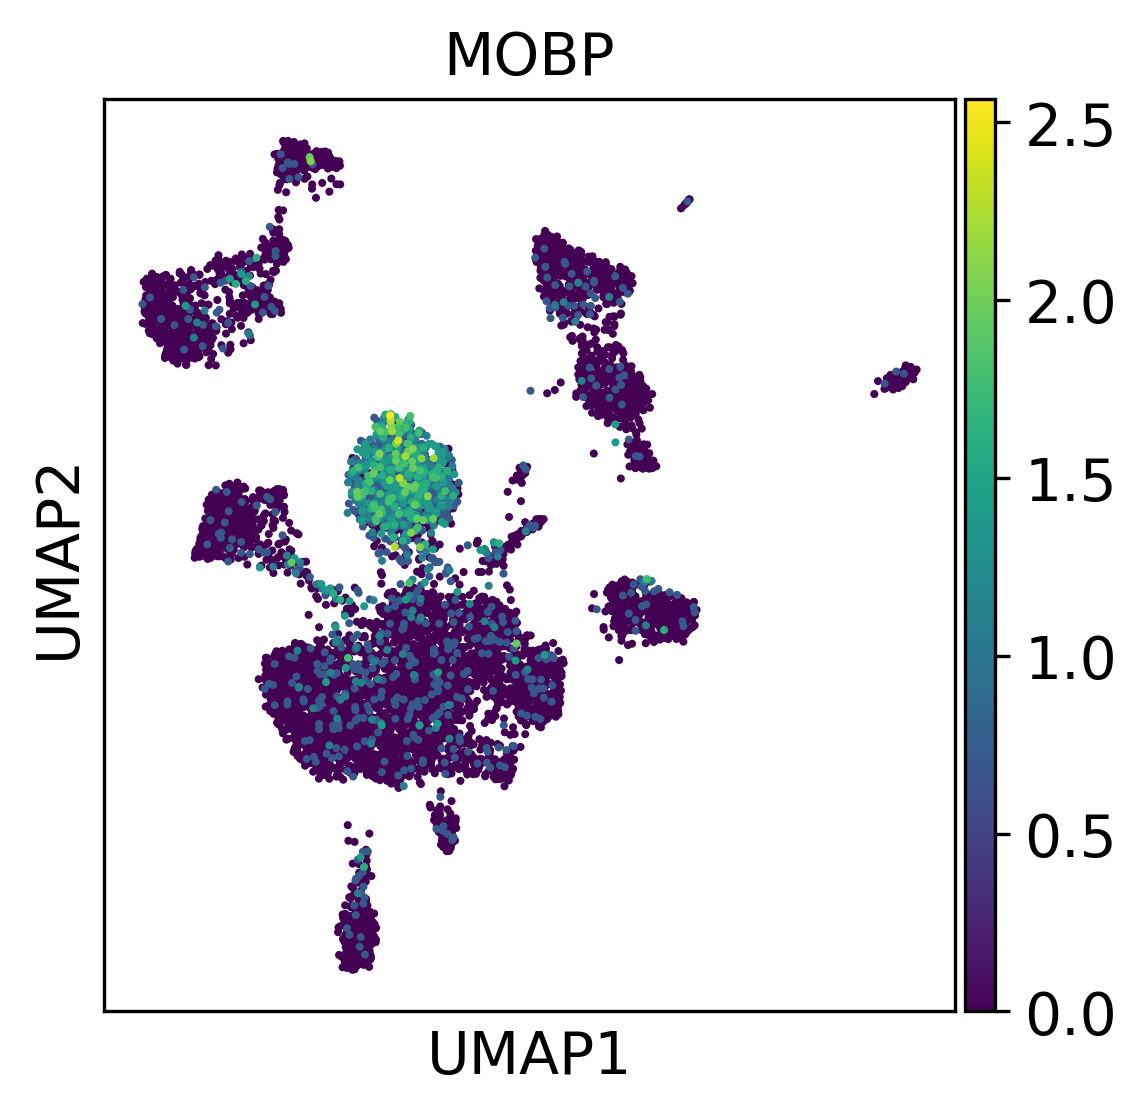

In [21]:
# Oligodendrocytes
sc.pl.umap(adata, color='MOBP')

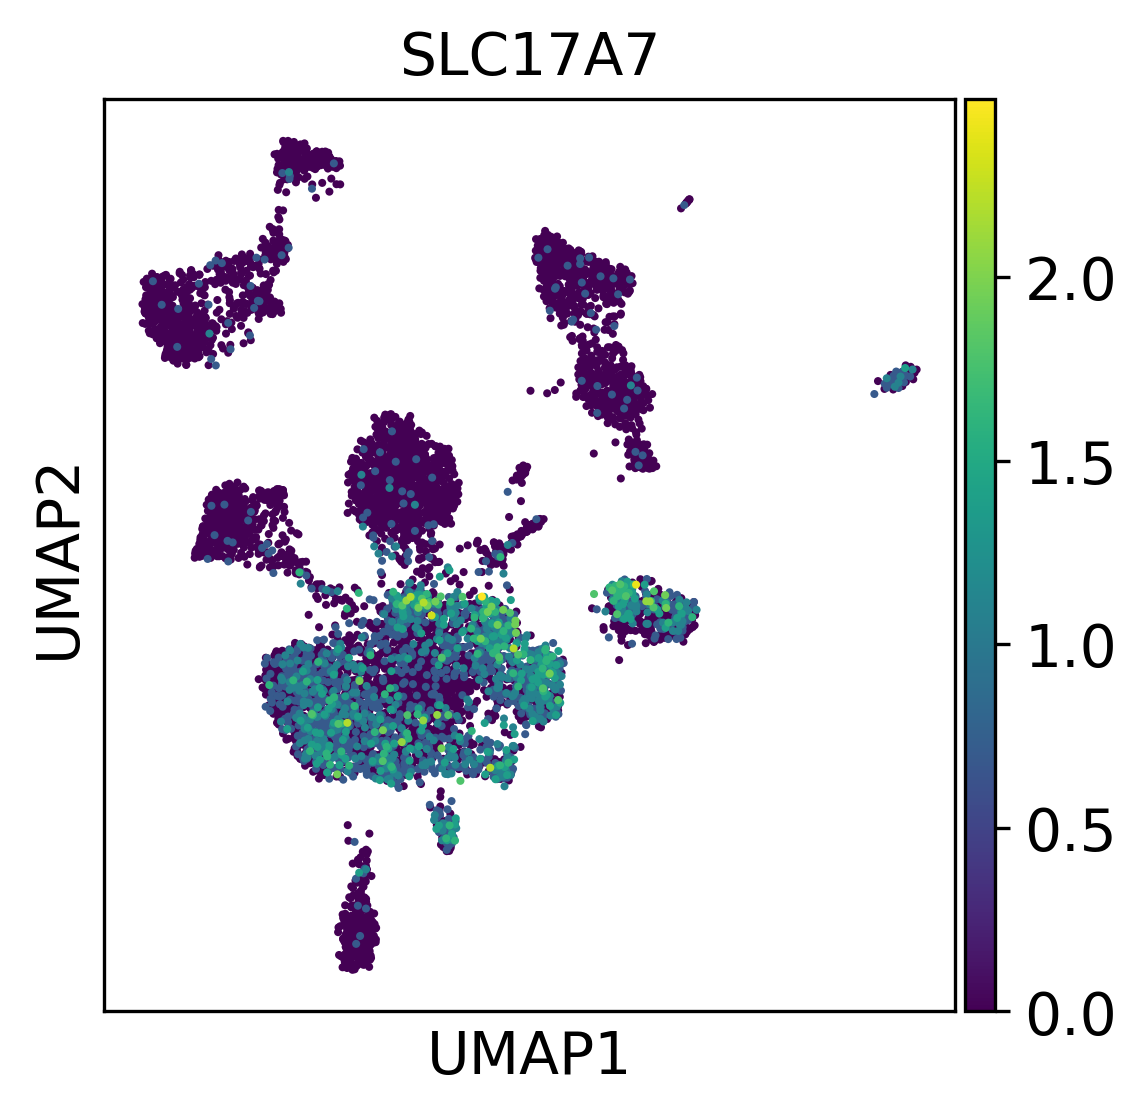

In [30]:
# Ex-Neurons
sc.pl.umap(adata, color='SLC17A7')

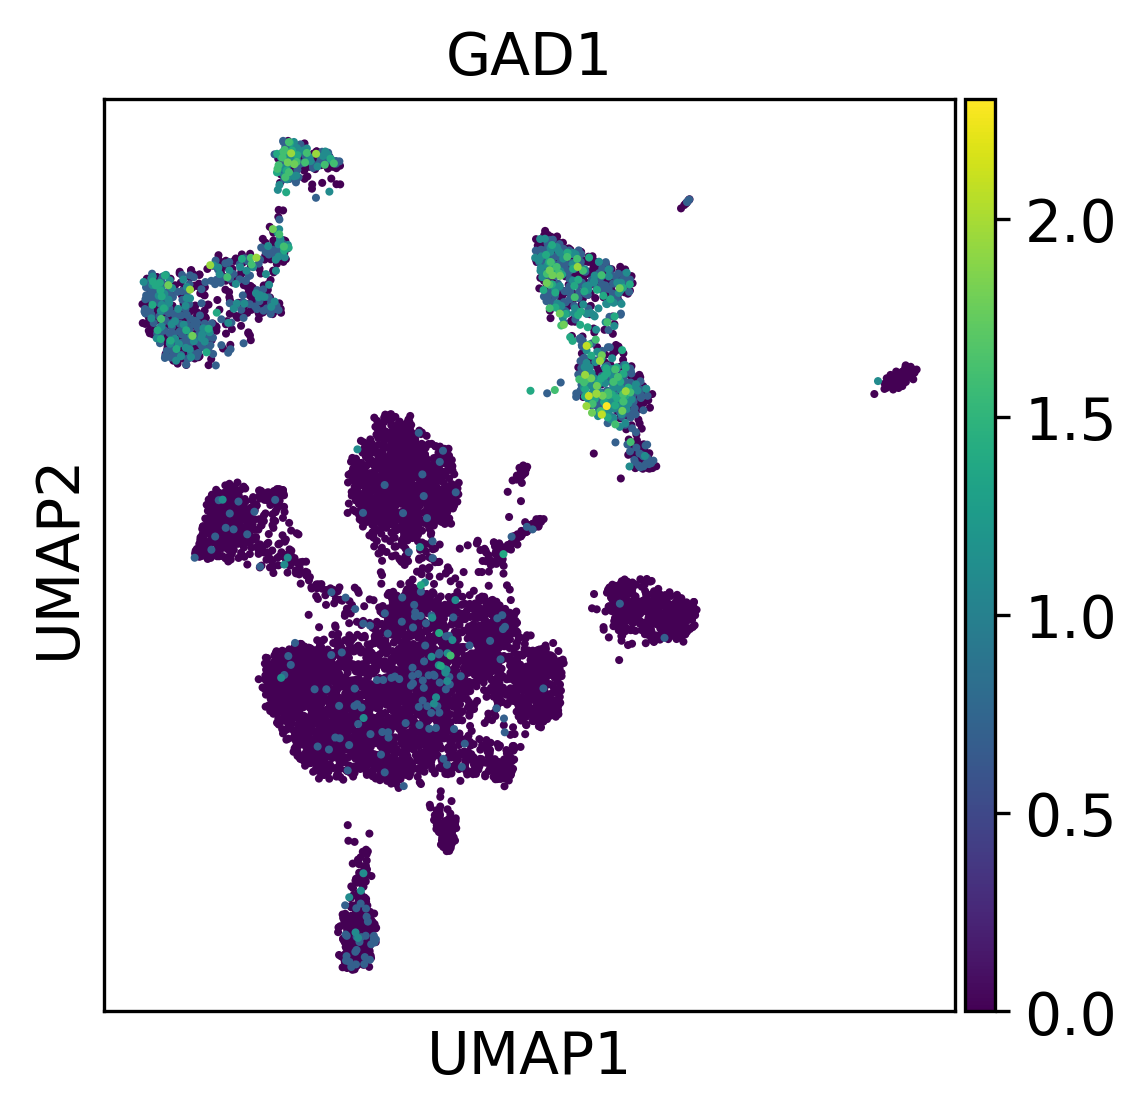

In [31]:
# In-Neurons
sc.pl.umap(adata, color='GAD1')

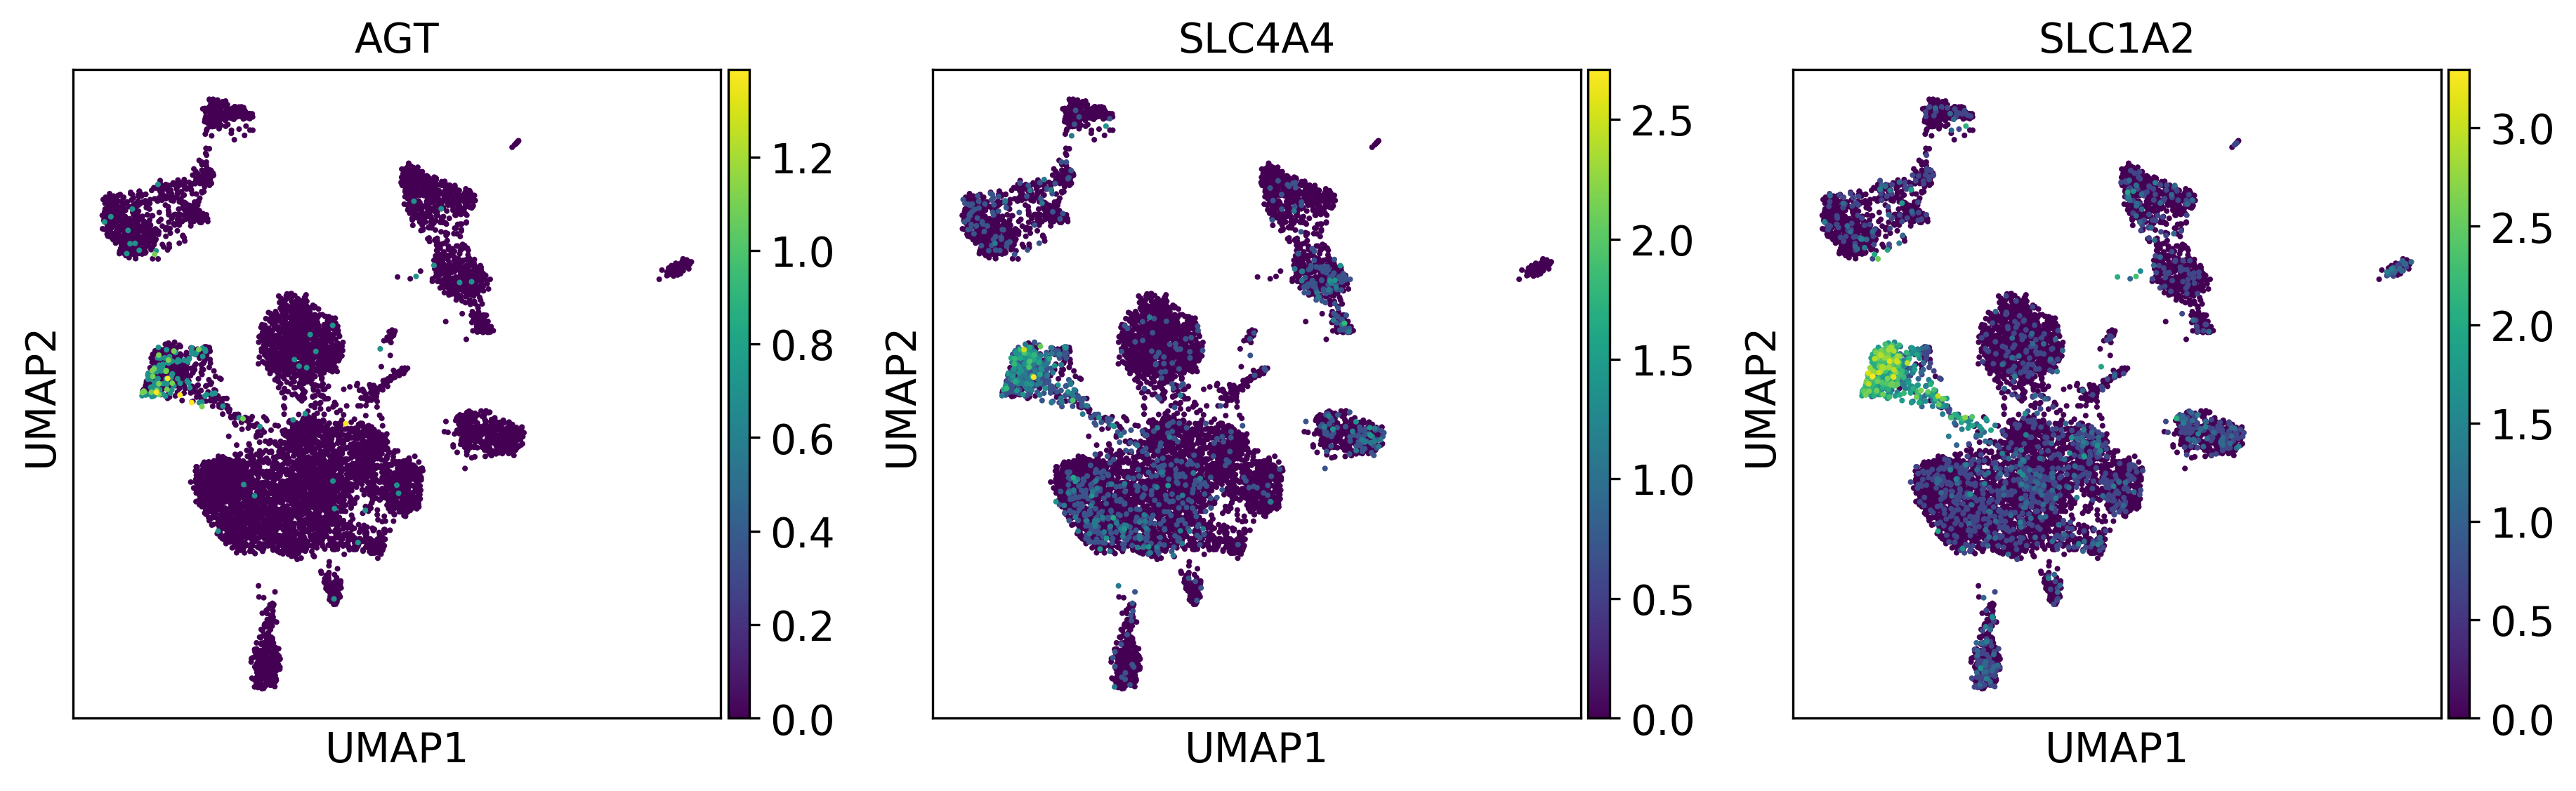

In [32]:
# Astrocytes
sc.pl.umap(adata, color=['AGT', 'SLC4A4', 'SLC1A2'])

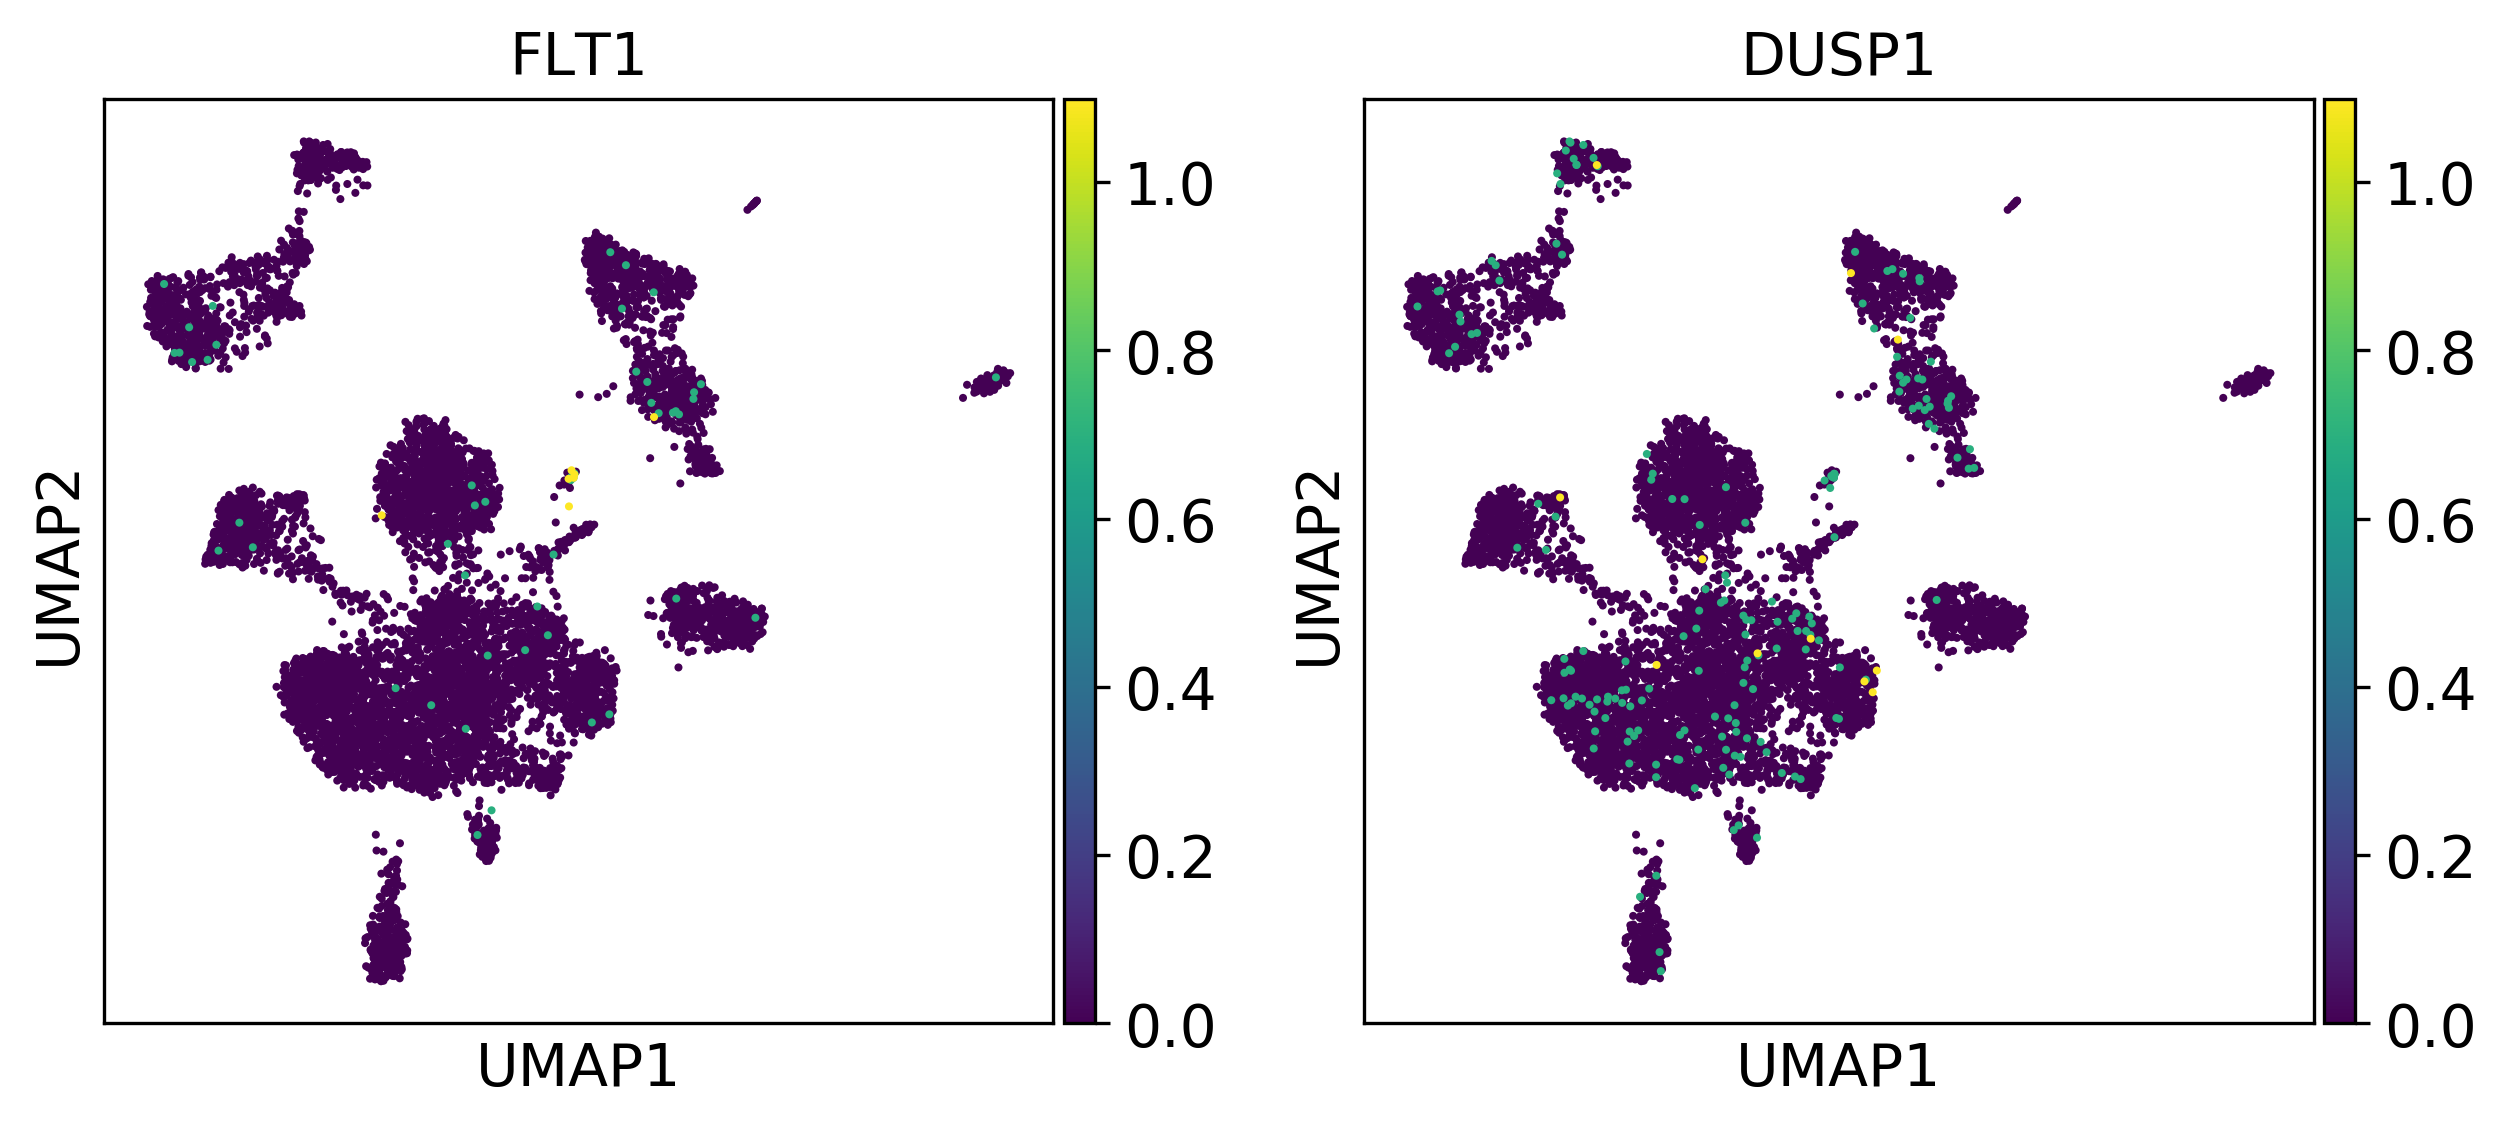

In [33]:
# Endothelial
sc.pl.umap(adata, color=['FLT1', 'DUSP1'])

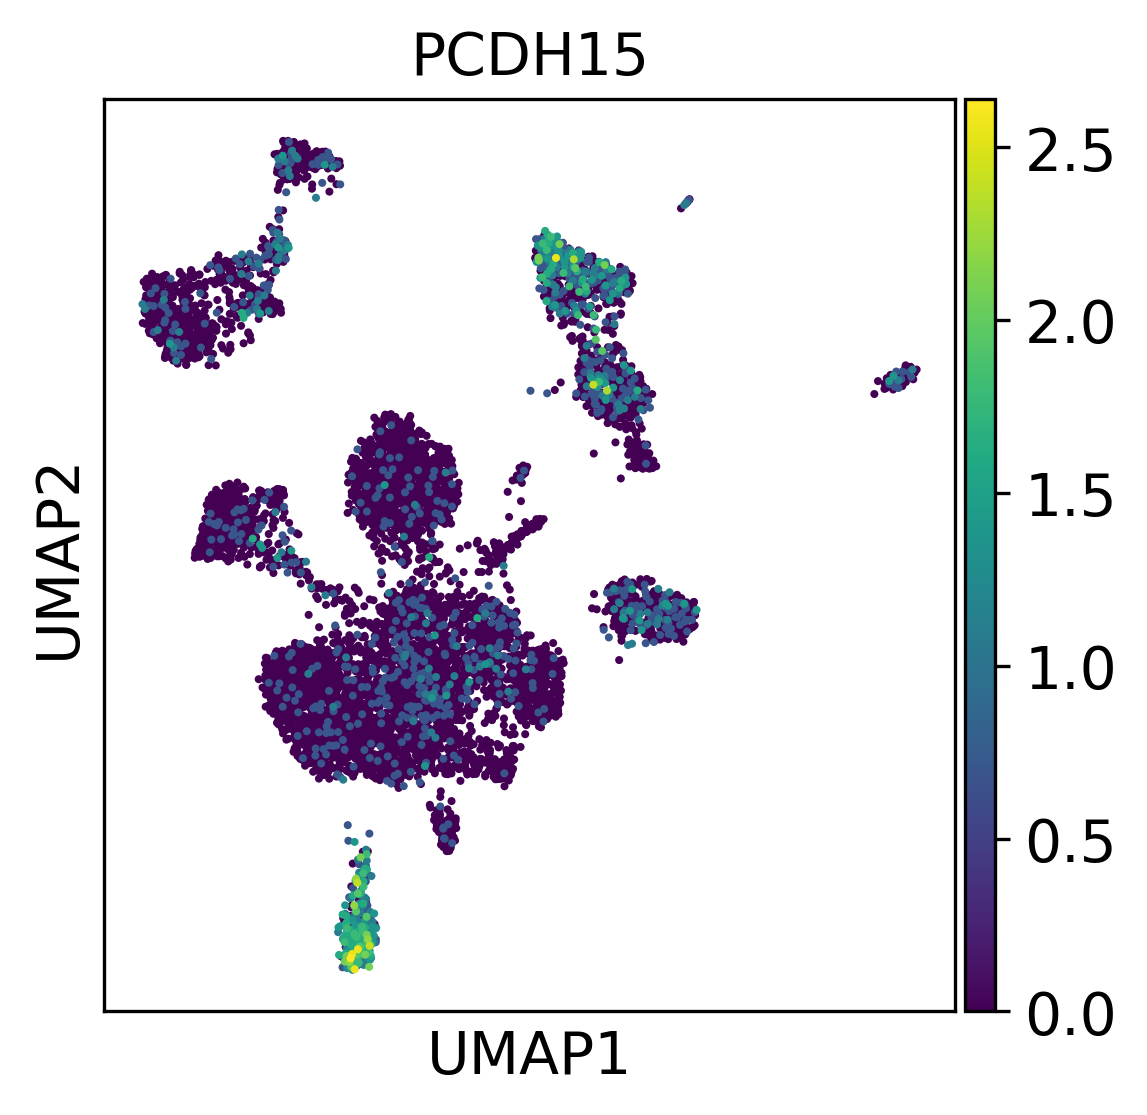

In [34]:
# OPC
sc.pl.umap(adata, color='PCDH15')

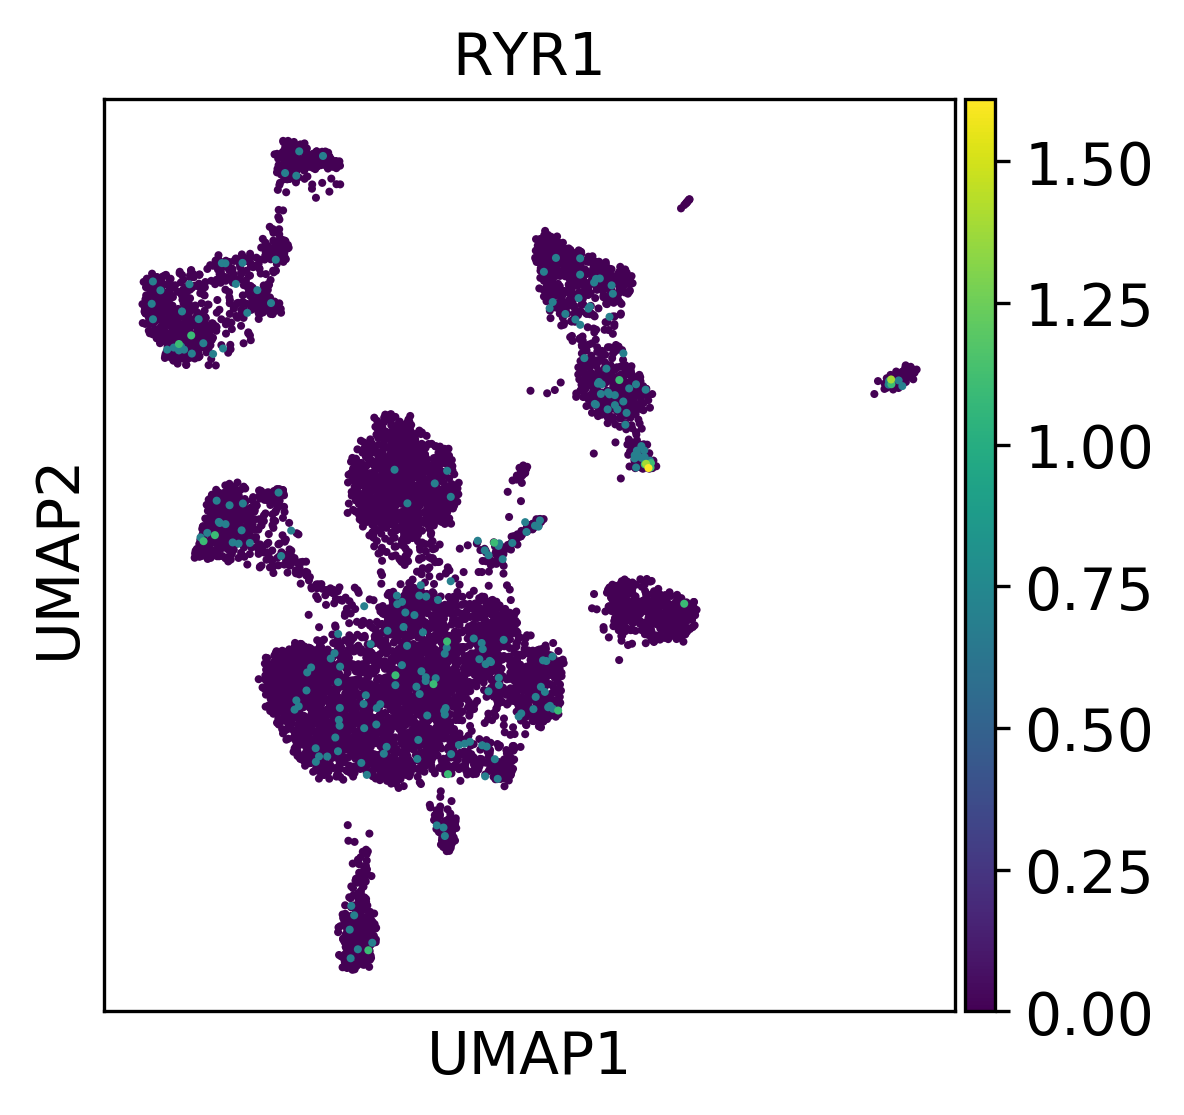

In [35]:
# Purkinie
sc.pl.umap(adata, color=['RYR1'])

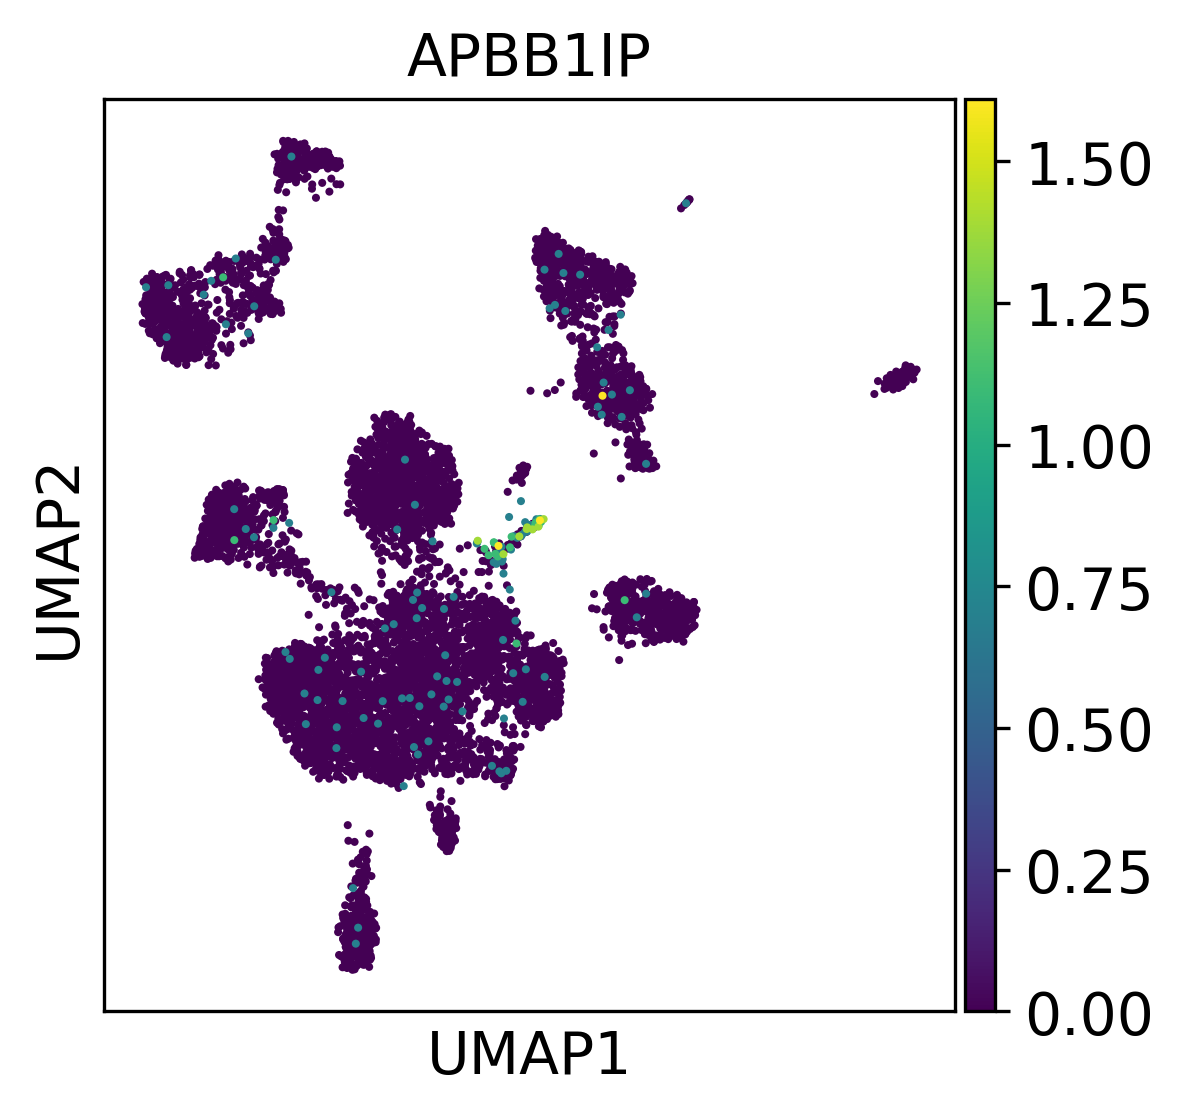

In [36]:
# Microglia
sc.pl.umap(adata, color=['APBB1IP'])

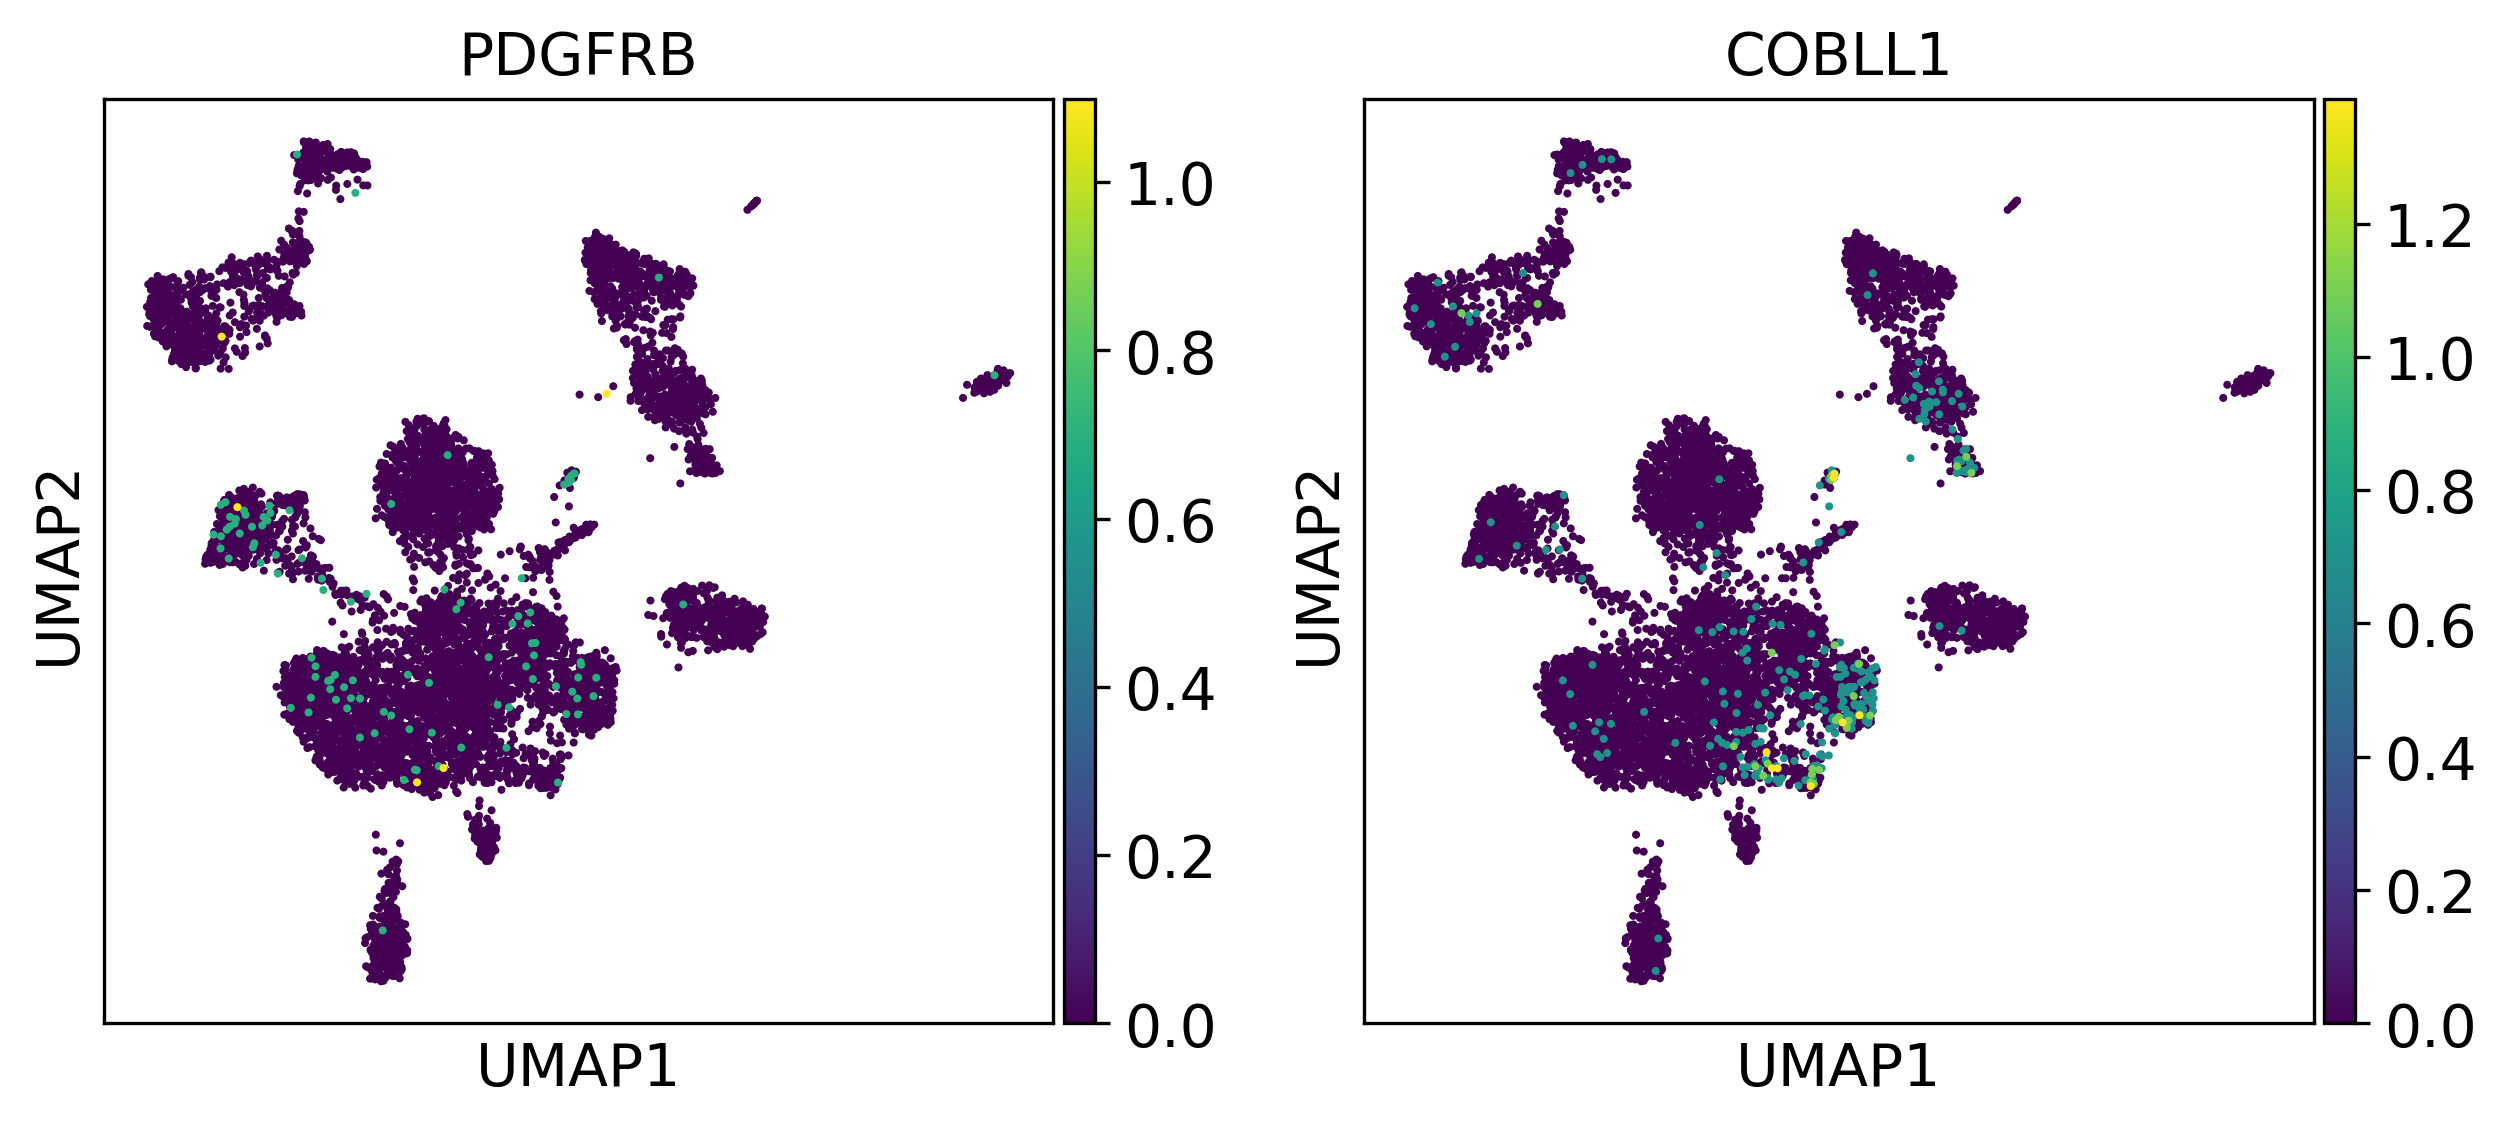

In [37]:
# Per
sc.pl.umap(adata, color=['PDGFRB', 'COBLL1'])

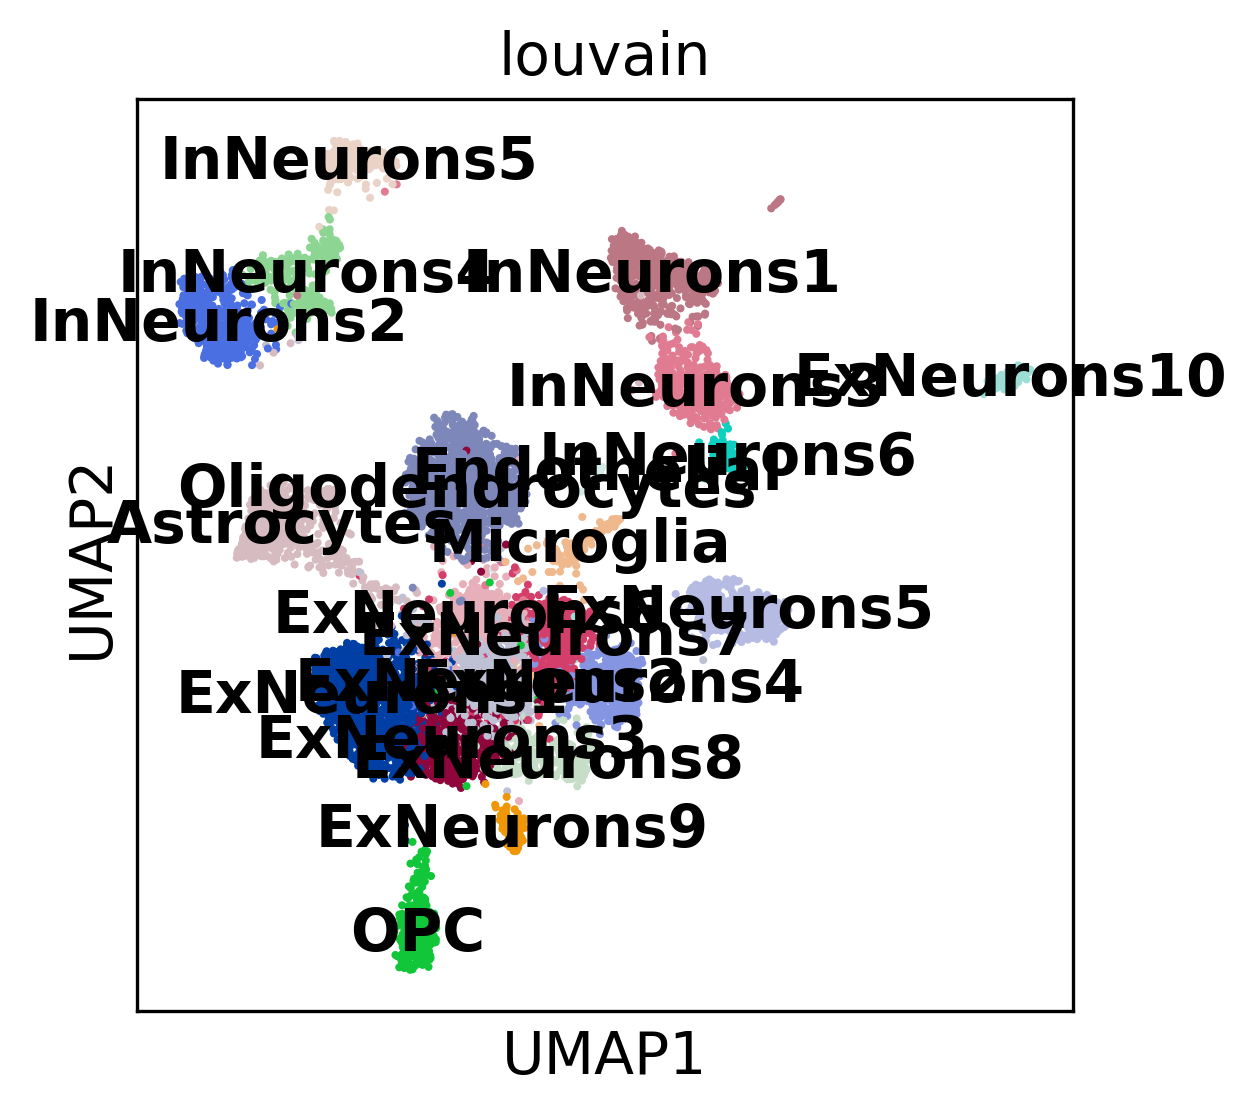

In [39]:
    new_celltypes = ['ExNeurons1', 'Oligodendrocytes', 'ExNeurons2', 'Astrocytes',
                'InNeurons1', 'ExNeurons3', 'InNeurons2', 'ExNeurons4', 'ExNeurons5',
                'ExNeurons6', 'InNeurons3', 'ExNeurons7', 'OPC', 'InNeurons4',
                    'ExNeurons8', 'InNeurons5', 'Microglia', 'ExNeurons9', 'InNeurons6', 'ExNeurons10', 'Endothelial']
adata.rename_categories('louvain', new_celltypes)
sc.pl.umap(adata, color='louvain', legend_loc='on data')

... storing 'celltype' as categorical


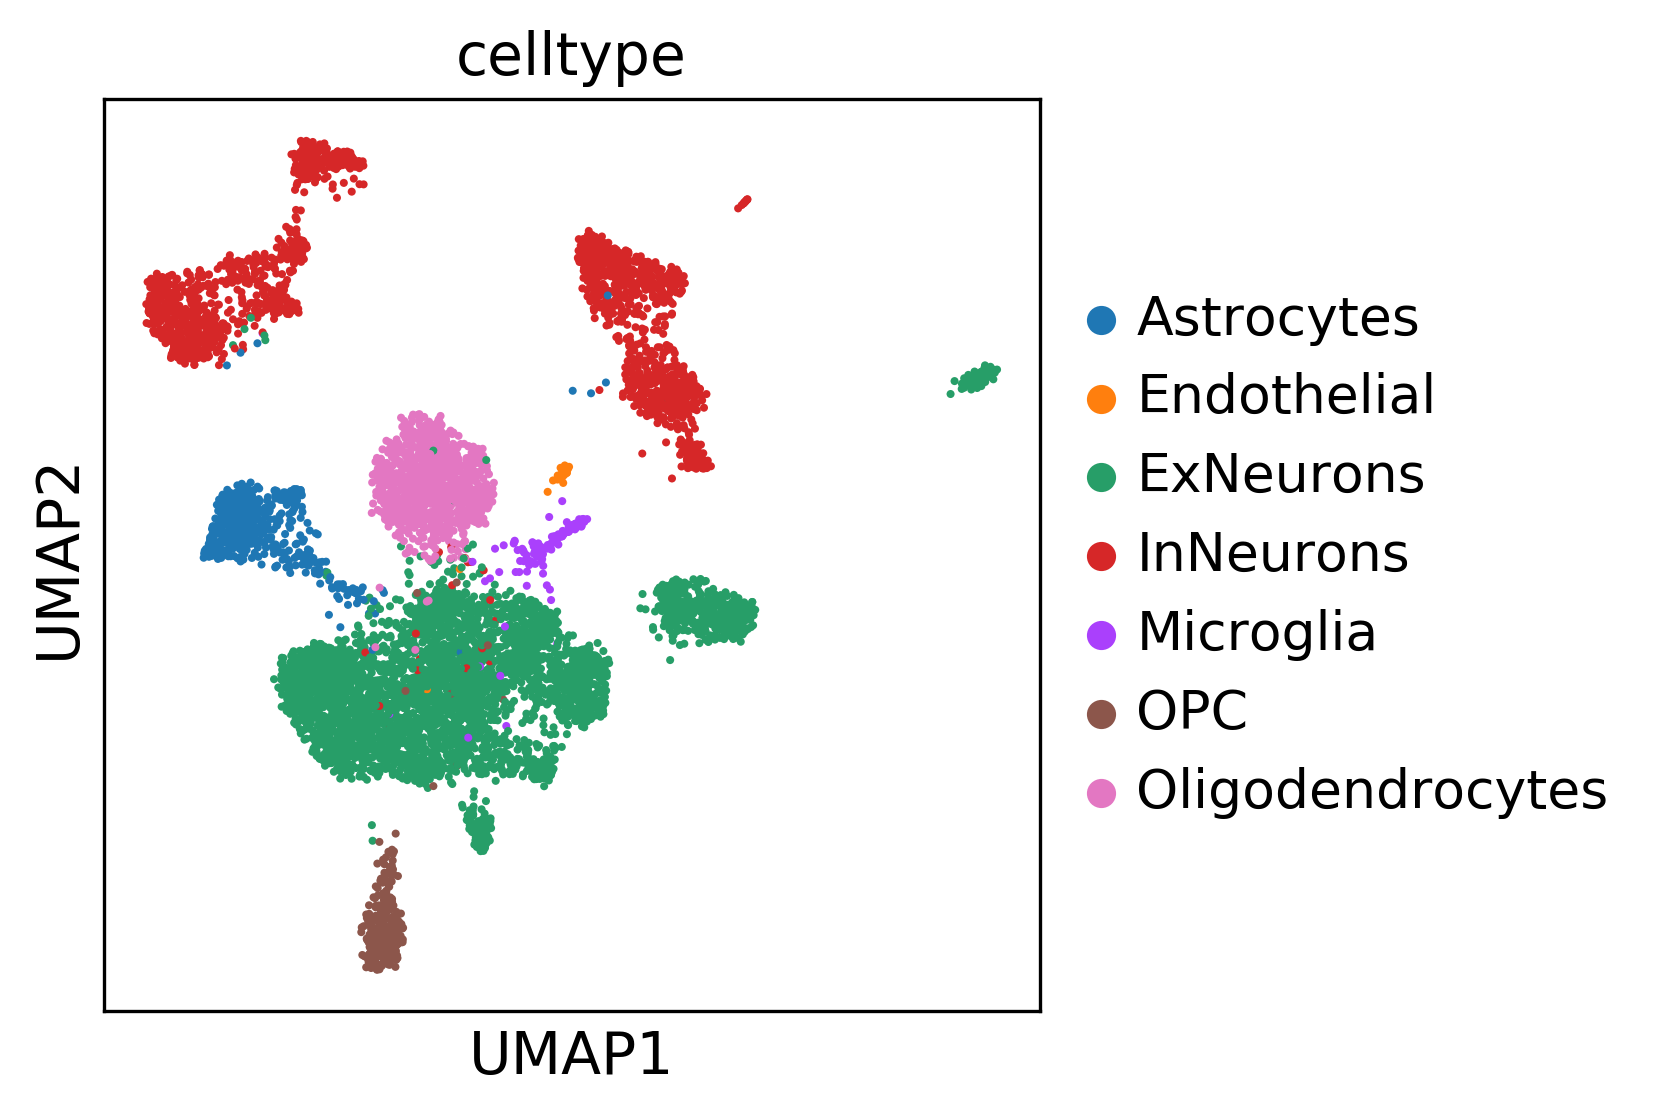

In [41]:
 # Make new category
celltypes = pd.DataFrame(adata.obs['louvain'])
#ex neurons
celltypes.louvain.replace(['ExNeurons1', 'ExNeurons2', 'ExNeurons3', 'ExNeurons4', 'ExNeurons5', 'ExNeurons6', 'ExNeurons7',
                           'ExNeurons8', 'ExNeurons9', 'ExNeurons10'],
                         ['ExNeurons', 'ExNeurons', 'ExNeurons', 'ExNeurons', 'ExNeurons', 'ExNeurons', 'ExNeurons', 'ExNeurons', 'ExNeurons', 'ExNeurons'], inplace=True)
celltypes.louvain.replace(['InNeurons1', 'InNeurons2', 'InNeurons3', 'InNeurons4', 'InNeurons5', 'InNeurons6'],
                         ['InNeurons', 'InNeurons', 'InNeurons', 'InNeurons', 'InNeurons', 'InNeurons'], inplace=True)

adata.obs['celltype'] = celltypes.louvain
sc.pl.umap(adata, color='celltype')

In [97]:
# Identify hand full of VLMCs manually
#tmp = pd.DataFrame(adata.X)
#tmp.columns = adata.var.index

#vlmc = tmp['COBLL1']
#vlmc_adapted = list(adata.obs['celltype'])
#count = 0
#for i in range(len(vlmc)):
#    if vlmc[i] > 1:
#        count +=1
#        vlmc_adapted[i] = "Endothelial"
#print(count)
#adata.obs['celltype'] = vlmc_adapted

280


In [42]:
# Save the celltypes
celltypes = pd.DataFrame(adata.obs['celltype'])
celltypes.columns = ['Celltype']
celltypes.to_csv(out_path + "lakeFrontal_celltypes.txt", sep="\t")